<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
df['salary'].mean()


113706.45843828715

In [9]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
gender_df=df.drop(['Unnamed: 0',	'rank',	'discipline',	'yrs.since.phd',	'yrs.service'],axis=1)
gender_df

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [11]:
male_df=gender_df[gender_df['sex']=='Male']
male_df['salary'].median()

108043.0

Finding the Median salary for all females

In [12]:
female_df=gender_df[gender_df['sex']=='Female']
female_df['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [13]:
male_df['salary'].mean()

115090.41899441341

In [14]:
female_df['salary'].mean()

101002.41025641025

In [15]:
# The difference between mean salaries of male and female
male_df['salary'].mean()-female_df['salary'].mean()

14088.008738003162

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [16]:
exp_df=df[df['yrs.service']>=20]

exp_df.shape


(157, 7)

In [17]:
exp_df['salary'].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [18]:
exp_df['salary'].describe()

count       157.000000
mean     122520.656051
std       29674.689571
min       57800.000000
25%      101036.000000
50%      119450.000000
75%      142500.000000
max      231545.000000
Name: salary, dtype: float64

In [19]:
under_twenty_df=df[df['yrs.service']<20]
under_twenty_df['salary'].describe()

count       240.000000
mean     107940.504167
std       29340.919333
min       63100.000000
25%       84435.000000
50%      103725.000000
75%      124412.500000
max      204000.000000
Name: salary, dtype: float64

In [20]:
exp_df['salary'].min()-under_twenty_df['salary'].min()

-5300

In [21]:
exp_df['salary'].max()-under_twenty_df['salary'].max()

27545

People who have salary of greater than or equal to 200,000

In [22]:
over_200000_df=df[df['salary']>=200000]
over_200000_df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


*Your* Findings here...
Only 3 professors have a salary of 200,000 and they are men.The professor with the minimum salary with over 20 years experience has a salary 5,300 less than a professor with less years of service.


# Rename values, subset columns, etc

In [37]:
df.rename(columns={'Unnamed: 0':'ID','yrs.service':'experience','sex':'M/F'},inplace=True)
df

,ID,rank,discipline,yrs.since.phd,experience,M/F,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

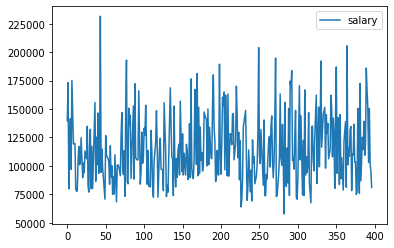

In [32]:
male_df.plot()

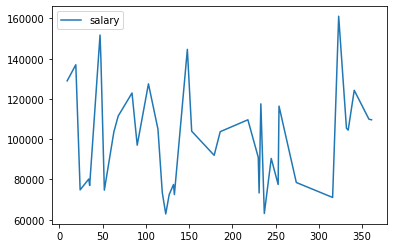

In [33]:
female_df.plot()

In [35]:
male_df['salary'].max()-female_df['salary'].max()

70444

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Female professors do not get paid as much as male professors. The highest male salary is 70,444 dollars higher than  the highest female salary. Salaries that are over 200,000 dollars are from male professors.   

